In [1]:
# import necessary functions
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
import typing
import random

random.seed(0)

In [2]:
# define function that prints summary statistics of features
def get_summaries(data: pd.DataFrame, features: typing.List[str], year: int) \
    -> None:

    data_year = data[data['Year'] == year]

    for feature in features:
        print(f"{feature}: ")
        print(f"{data_year[feature].describe()}\n")

In [3]:
# define function that creates line plots of co2 emissions over time
def plot_lines(data: pd.DataFrame, feature: str, plot_every: int) -> None:

    # Adjust the size of the figure
    plt.figure(figsize=(20, 10))  # Adjust width, height as needed
    
    # Plot line graphs for the specified feature for each country
    for i, country in enumerate(set(data['Entity'])):
        if i % plot_every == 0:
            country_data = data[data['Entity'] == country]
            # Drop rows where the year or the feature value is NaN
            feature_data = country_data[['Year', feature]].dropna()
            plt.plot(feature_data['Year'], feature_data[feature], marker='o', label=country)
    
    plt.title('Sample of CO2 Emissions from 2000 to 2020')
    plt.xlabel('Year')
    plt.ylabel('CO2 Emissions (metric tons per person)')
    plt.xticks(range(2000, 2020, 2))
    plt.legend()  # Add a legend

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout
    plt.show()

In [4]:
# define function that creates historams of all variables
def plot_histograms(data: pd.DataFrame, features: typing.List[str], year: int) \
    -> None:

    data_year = data[data['Year'] == year]

    plt.figure(figsize=(15, 10))  # Adjust the size of the figure as needed

    for i, feature in enumerate(features):
        plt.subplot(len(features) + 1, 1, i + 1)  # Create a subplot for each feature
        data_year[feature].hist(bins=20)  # Adjust the number of bins as needed
        plt.title(f"{feature} [{year}]")
        plt.ylabel('Frequency')

    plt.tight_layout()  # Adjust the layout so that plots do not overlap
    plt.show()

In [5]:
# define function that uses k folds to find best depth value for tree
def get_best_depth(k: int, max_depth: int, X: pd.DataFrame, y: pd.Series) \
    -> typing.List[float]:

    kf = KFold(n_splits=k, shuffle=True, random_state=0)
    depth_scores = []

    for depth in range(1, max_depth):
        regressor = DecisionTreeRegressor(max_depth=depth, random_state=0)
        curr_score = cross_val_score(regressor, X, y, cv=kf, scoring='neg_mean_squared_error')
        depth_scores.append(curr_score.mean())

    return depth_scores

In [6]:
# define function to find the best ccp_alpha using cross-validation
def get_best_ccp_alpha(k: int, ccp_alphas: np.ndarray, X: pd.DataFrame, y: pd.Series) \
    -> float:

    kf = KFold(n_splits=k, shuffle=True, random_state=0)
    sampled_ccp_alphas = ccp_alphas[::50]
    alpha_scores = []

    for ccp_alpha in sampled_ccp_alphas:
        regressor = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
        curr_score = cross_val_score(regressor, X, y, cv=kf, scoring='neg_mean_absolute_error')
        alpha_scores.append(curr_score.mean())

    # return the alpha that maximizes the cross-validated score
    return ccp_alphas[np.argmax(alpha_scores)]

In [7]:
# load data
data = pd.read_csv('global-data-on-sustainable-energy.csv')

In [8]:

# define features and variable to be predicted
features = [
    'Access to electricity (% of population)',
    'Electricity from fossil fuels (TWh)',
    'Electricity from nuclear (TWh)',
    'Electricity from renewables (TWh)'
    ]
to_be_predicted = 'Value_co2_emissions_kt_by_country'
X = data[features]
y = data[to_be_predicted]

# handle missing values with median
X = X.fillna(X.median())
y = y.fillna(y.median())


In [9]:
# generate summary stats
get_summaries(data, features + [to_be_predicted], 2000)

Access to electricity (% of population): 
count    170.000000
mean      73.121292
std       34.505240
min        1.613591
25%       42.155707
50%       94.715340
75%      100.000000
max      100.000000
Name: Access to electricity (% of population), dtype: float64

Electricity from fossil fuels (TWh): 
count     172.000000
mean       49.466453
std       231.400336
min         0.000000
25%         0.157500
50%         2.090000
75%        21.867500
max      2697.280000
Name: Electricity from fossil fuels (TWh), dtype: float64

Electricity from nuclear (TWh): 
count    167.000000
mean      13.430838
std       72.124282
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      753.890000
Name: Electricity from nuclear (TWh), dtype: float64

Electricity from renewables (TWh): 
count    172.000000
mean      14.882326
std       50.358950
min        0.000000
25%        0.010000
50%        0.760000
75%        6.475000
max      363.700000
Name: Electricity from rene

In [10]:
get_summaries(data, features + [to_be_predicted], 2020)

Access to electricity (% of population): 
count    175.000000
mean      85.460078
std       24.568644
min        7.241338
25%       74.568810
50%      100.000000
75%      100.000000
max      100.000000
Name: Access to electricity (% of population), dtype: float64

Electricity from fossil fuels (TWh): 
count     174.000000
mean       82.582701
std       444.797952
min         0.000000
25%         0.415000
50%         3.415000
75%        29.962500
max      5184.130000
Name: Electricity from fossil fuels (TWh), dtype: float64

Electricity from nuclear (TWh): 
count    169.000000
mean      13.186982
std       72.754233
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      789.880000
Name: Electricity from nuclear (TWh), dtype: float64

Electricity from renewables (TWh): 
count     174.000000
mean       40.063448
std       185.960544
min         0.000000
25%         0.210000
50%         2.935000
75%        14.655000
max      2184.940000
Name: Electricity f

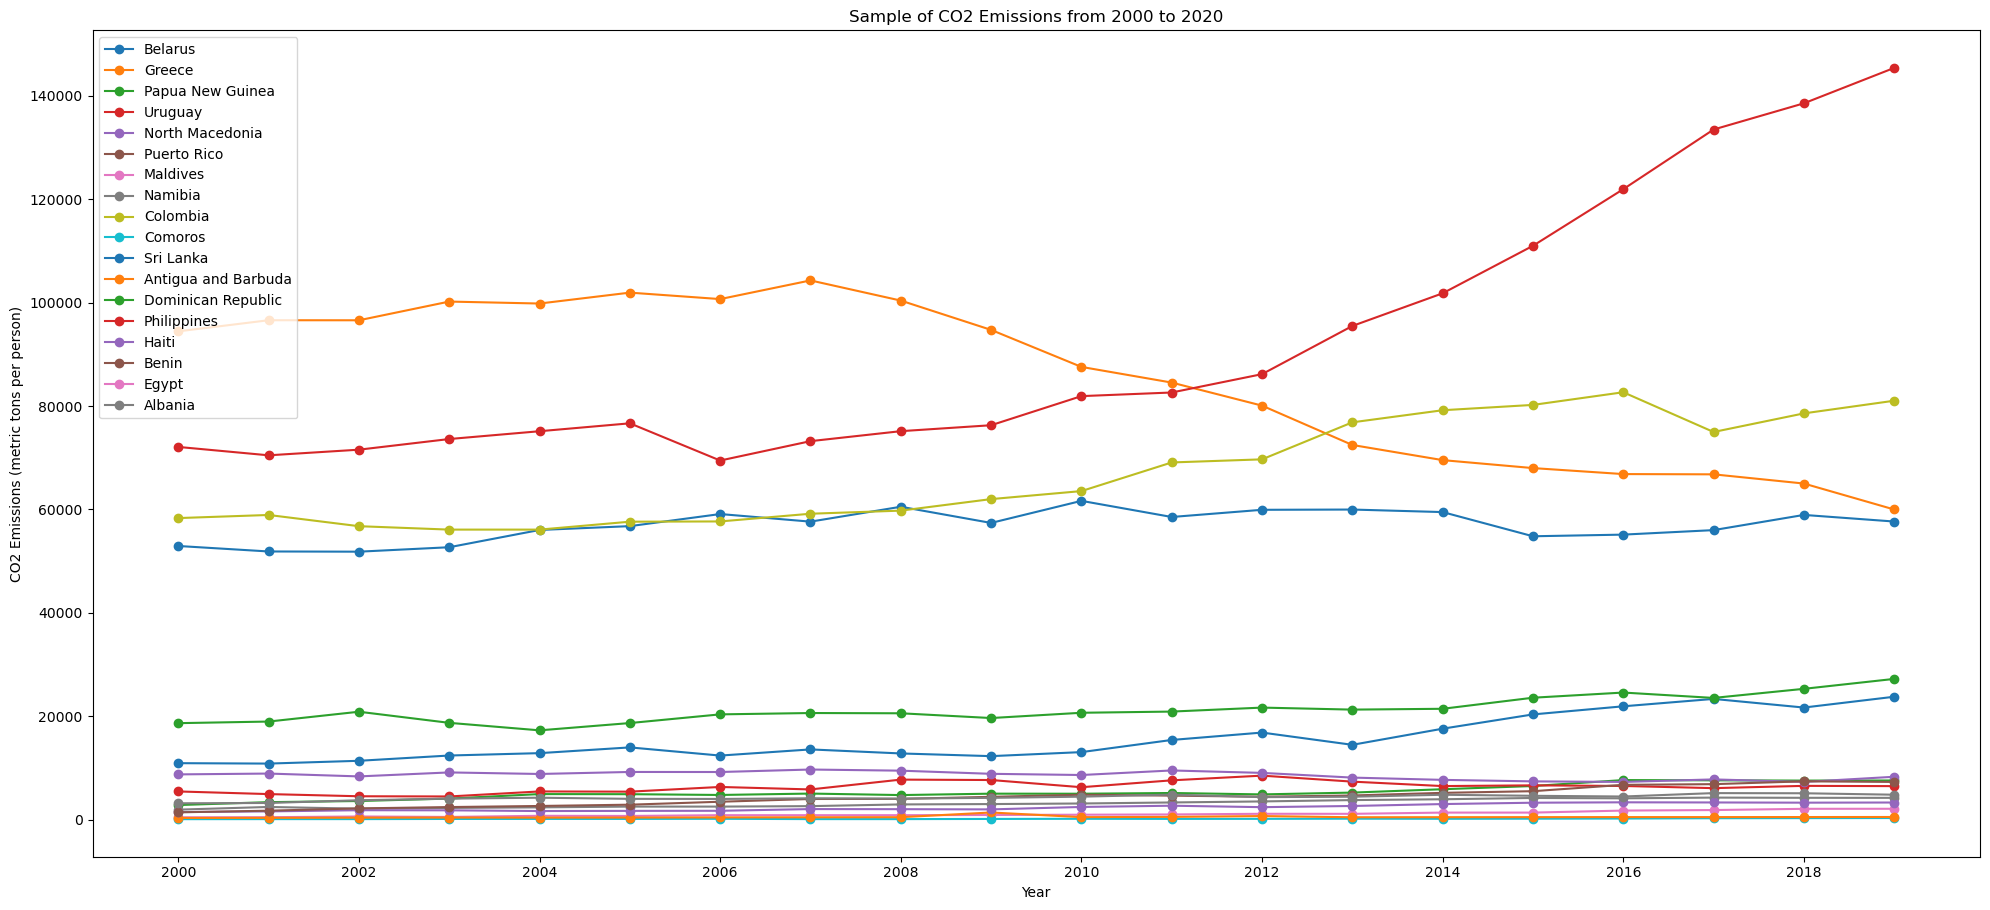

In [11]:
# generate line plots of co2 emissions over time
plot_lines(data, to_be_predicted, 10)

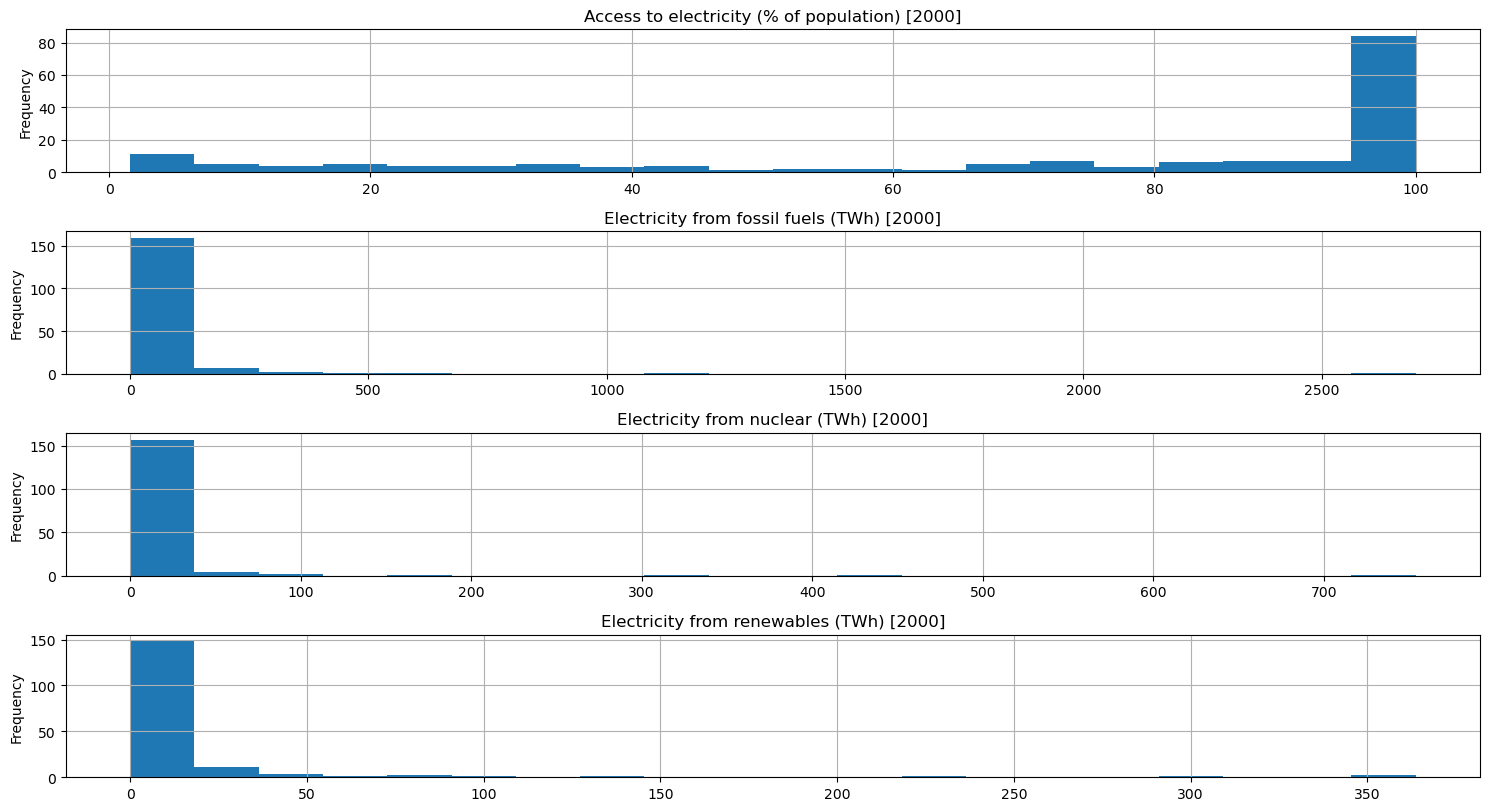

In [12]:
plot_histograms(data, features, 2000)

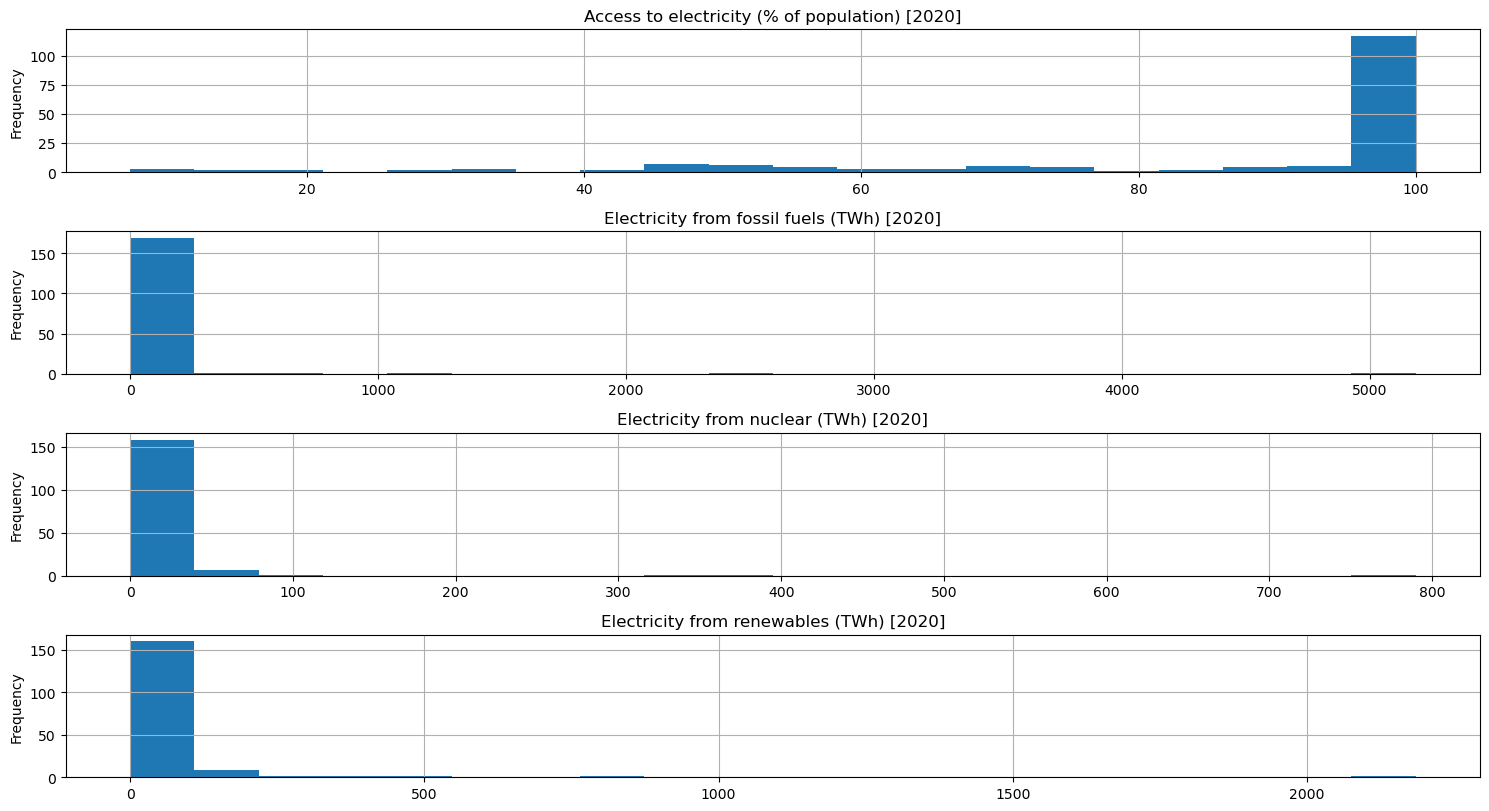

In [13]:
plot_histograms(data, features, 2020)

In [14]:
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
# find best ccp_alpha for pruning
regressor = DecisionTreeRegressor(random_state=0)
path = regressor.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas 

# decide optimal ccp_alpha
k = 10
optimal_ccp_alpha = get_best_ccp_alpha(k, ccp_alphas, X_train, y_train)
print(f"Optimal ccp_alpha for pruning: {optimal_ccp_alpha}")


Optimal ccp_alpha for pruning: 2.1907792469478936e-17


In [16]:
# determine optimal depth using the get_best_depth function
max_depth = 10
cv_scores = get_best_depth(k, max_depth, X_train, y_train)

# find depth with the highest cross-validated score
best_depth = cv_scores.index(max(cv_scores)) + 1  # +1 because index 0 corresponds to depth 1
print(f"Best tree depth: {best_depth}")

Best tree depth: 2


In [17]:
# initialize decision tree regressor model with pruning and fit training data
regressor = DecisionTreeRegressor(max_depth=best_depth, random_state=0, ccp_alpha=optimal_ccp_alpha)
regressor.fit(X_train, y_train)

# test model with test data and calculate MSE
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 90309900113.46992
Mean Absolute Error: 96468.60065967555


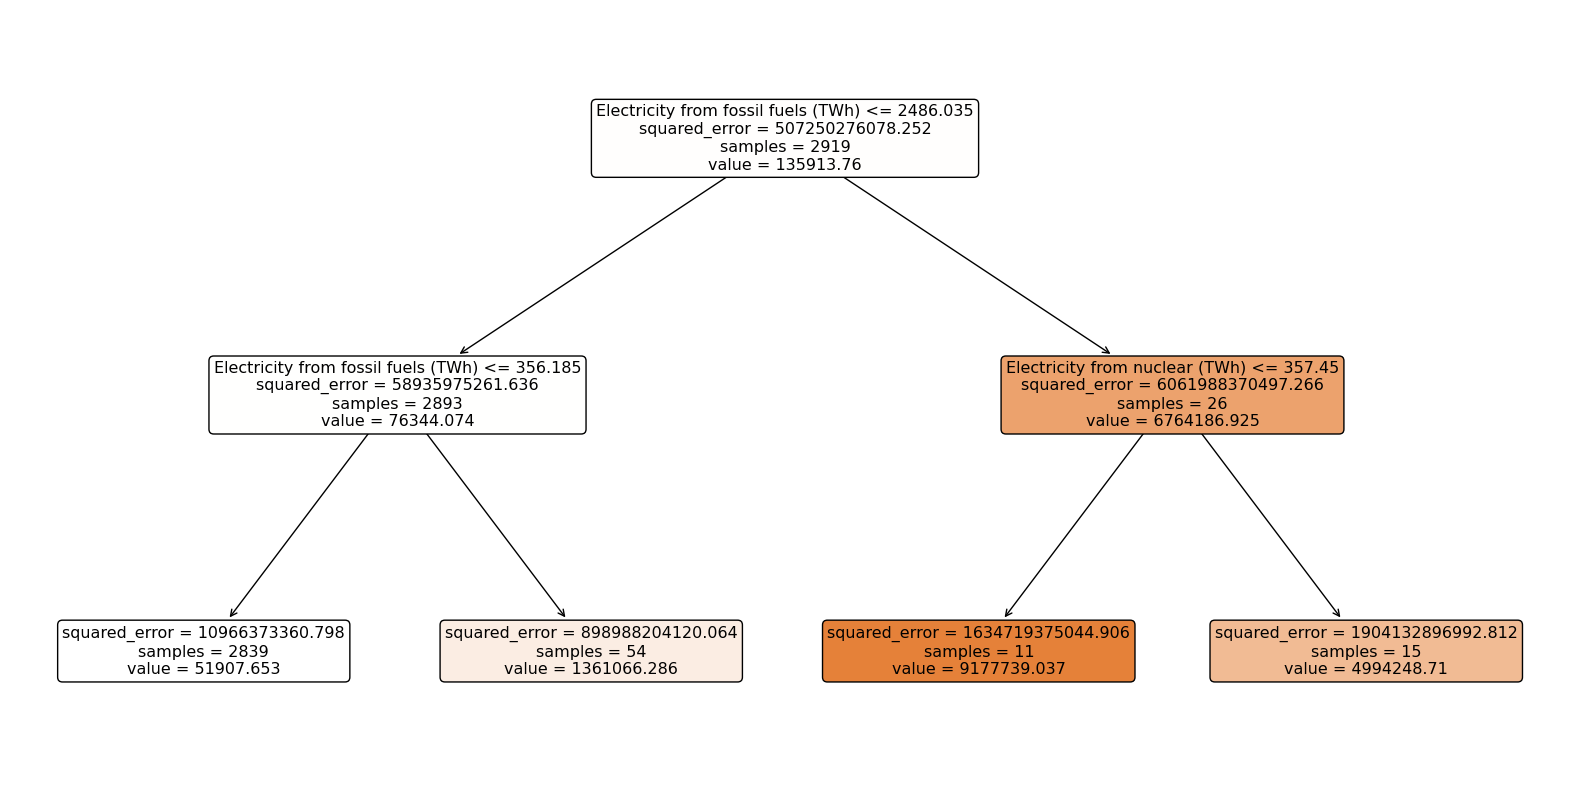

In [18]:
plt.figure(figsize=(20,10))
tree.plot_tree(regressor, 
               feature_names=features, 
               filled=True, 
               rounded=True)
plt.show()